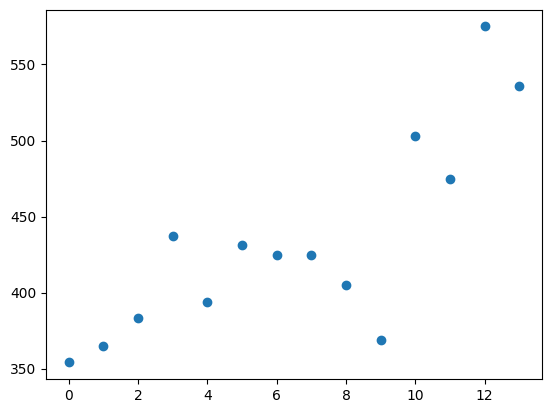

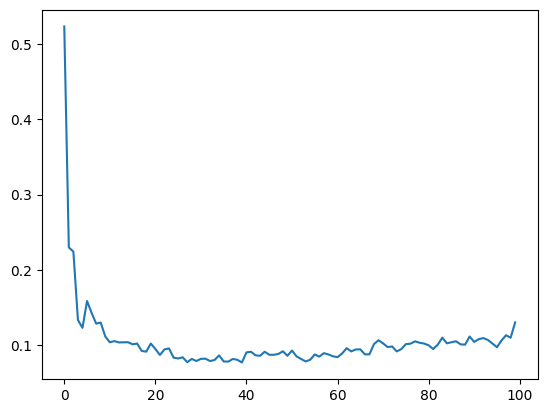

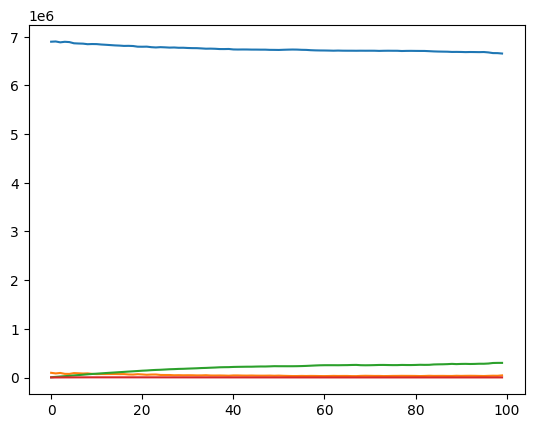

In [51]:
import pandas as pd 
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

data = pd.read_csv('../datasets/COVID_ADMISSIONS_CA.csv').to_numpy()
data = np.delete(data,0,1)
plt.scatter(np.arange(0,14),data[100:114])
plt.show()
beta = pd.read_csv('../datasets/beta.csv')
beta = np.delete(beta,0,1)
plt.plot(beta)
plt.show()

state = pd.read_csv('../datasets/state.csv')
state = np.delete(state,0,1)
plt.plot(state)
plt.show()

beta = beta[-1]
gamma = 0.1
D = 10
L = 90
hosp = 5.3


